### **Electric Vehicle Range Prediction** ###

Electric Vehicle Population Data is a data source from official US government website - US department of Licensing  from Data.Gov(https://catalog.data.gov/dataset/electric-vehicle-population-data). It shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are registered through Washington State Department of Licensing. 

The dataset was created on November 10, 2020, last updated, January 19, 2024. 

The primary goal of this project is to develop a regression model that can accurately predict the electric range of electric vehicles (EVs) based on various features such as model year, make, model, etc. With the insights, it helps 1. Consumers understand what factor influence electric range, guiding them in making informed decision when purchasing EVs 2. Offers industry insights into competitive analysis and trends over time. 


##### **Data Dictionary** #####
Contains 166,800 entries and 17 columns. 

The columns are the follows: 
- VIN (1-10): Partial Vehicle Identification Number
- County: Country where the vehicle is registered
- City: City where the vehicle is registered
- State: State where the vehicle is registered (all entries are WA for Washington)
- Postal Code: The postal code where the vehicle is registered
- Model Year: The year the vehicle model was made
- Make: Manufacturer of the vehicle
- Model: Model of the vehicle
- Electric Vehicle Type: Specifies whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid - Electric Vehicle (PHEV)
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates eligibility for clean alternative fuel vehicle benefits
- Electric Range: The electric range of the vehicle in miles
- Base MSRP: Manufacturer's Suggested Retail Price at base level
- Legislative District: The legislative district where the vehicle is registered
- DOL Vehicle ID: The Department of Licensing Vehicle ID
- Vehicle Location: Coordinates (longitude and latitude) of the vehicle location
- Electric Utility: The electric utility provider in the vehicle's area
- 2020 Census Tract: The census tract where the vehicle is registered



##### **Project Steps:** #####
1. Project Setup 
2. EDA
3. Data Preprocessing
4. Feature Engineering 
5. Model Training
6. Model Evaluation

#### **Project Setup** ####

In [1]:
#Library Load
try: 
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
except ImportError as e:
    print(f'Error occured {e}.')
    exit()



In [5]:
path = 'Electric_Vehicle_Population_Data.csv'
ev = pd.read_csv(path)

In [6]:
original_ev = ev.copy()

In [7]:
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


#### **Exploratory Data Analysis** ####

In [8]:
print(ev.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

- 17 columns in total. 
- Types of data: integer, float, and object (string).
- Some null values present in the data. Maximum counts on a column is 166,800. 

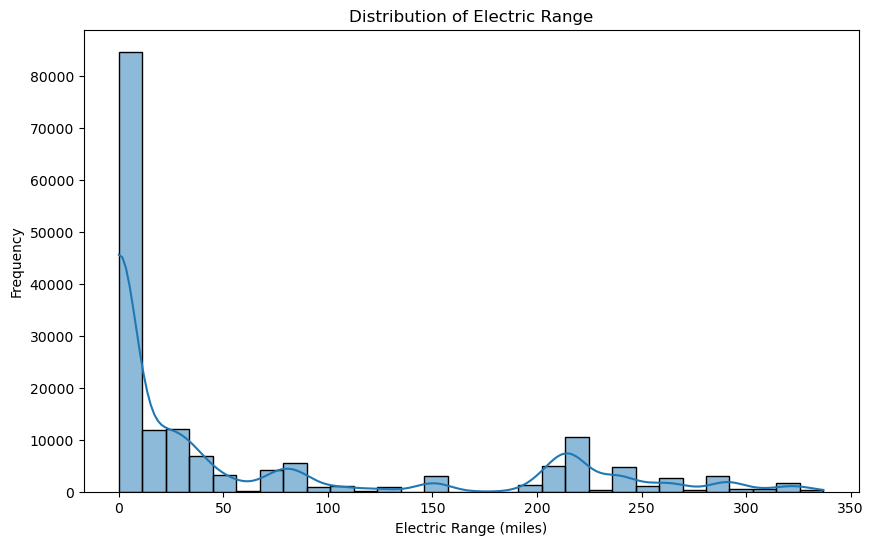

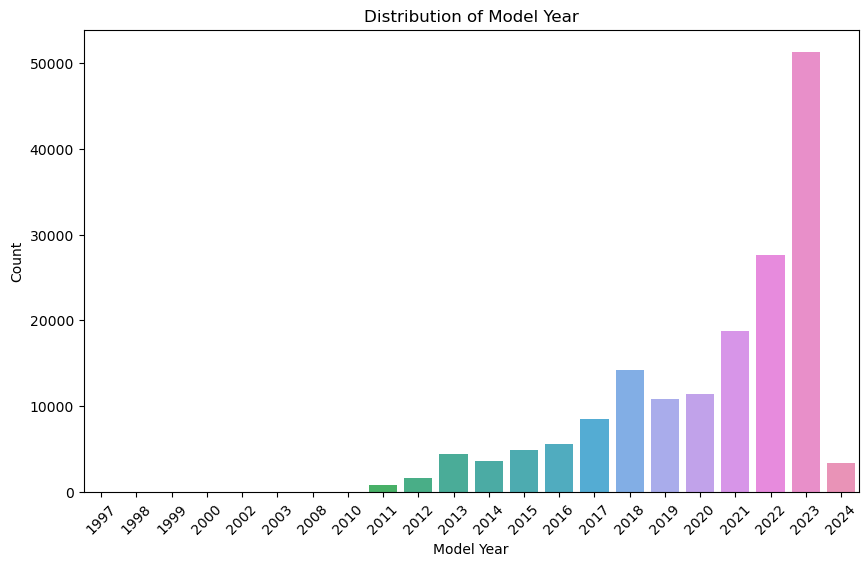

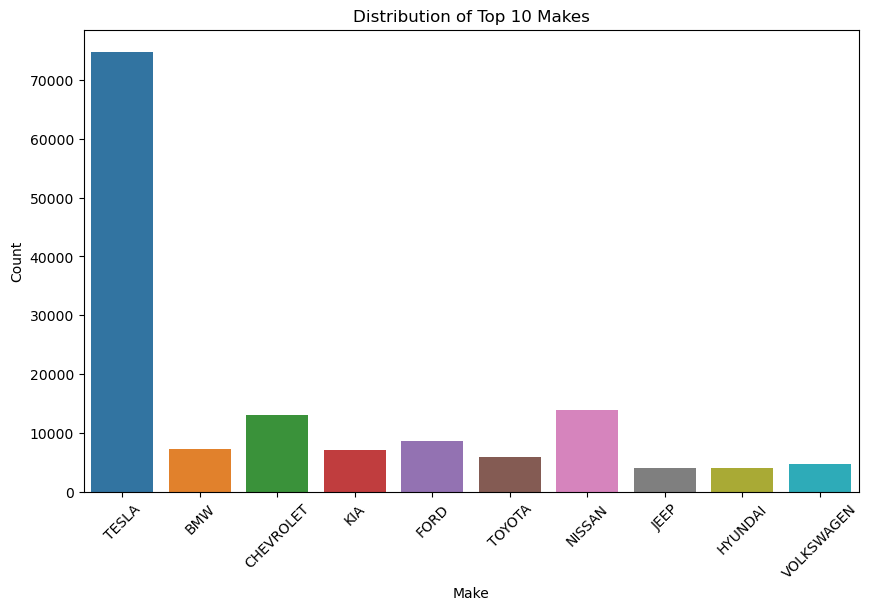

In [9]:
#Electric Range Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ev['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

#Model Year Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=ev)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Distribution of Make
plt.figure(figsize=(10, 6))
top_makes = ev['Make'].value_counts().nlargest(10).index
sns.countplot(x='Make', data=ev[ev['Make'].isin(top_makes)])
plt.title('Distribution of Top 10 Makes')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


Distribution of Electric Range: 
- Highly skewed distribution of electric range. Most vehicles have a low range and a few with very high range. 
- It potentially could affect the performance of regression models since they assume normally distributed errors. Possibly, logarithmic transformation would reduce skewness.

Distribution of model year: 
- Trend towards a newer models. High in 2021~2023.

Distribution of top 10 makes: 
- Tesla is the main distributor. Possible with overfitting issues when modeling due to Tesla vehicles.

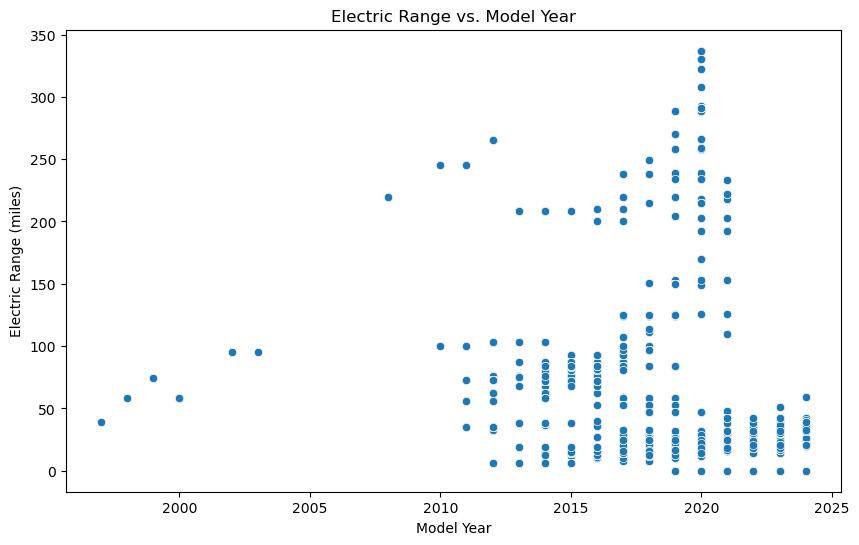

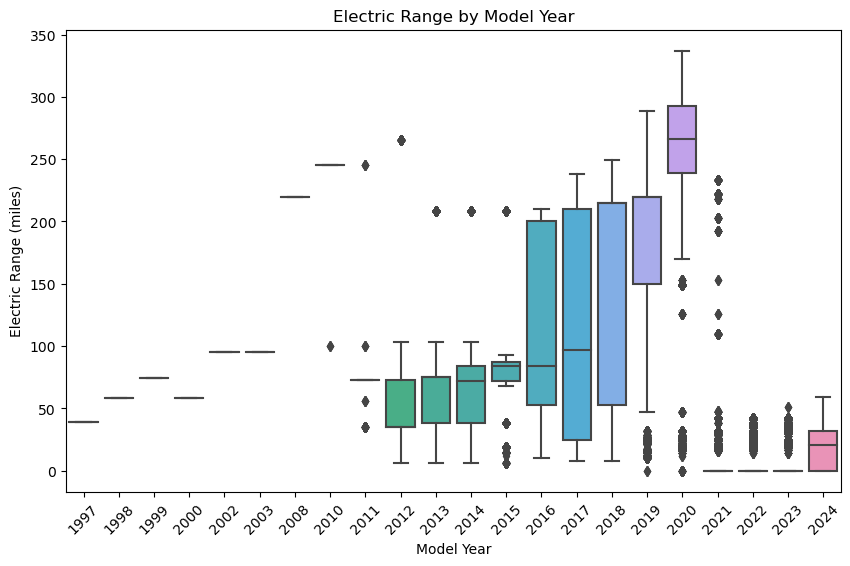

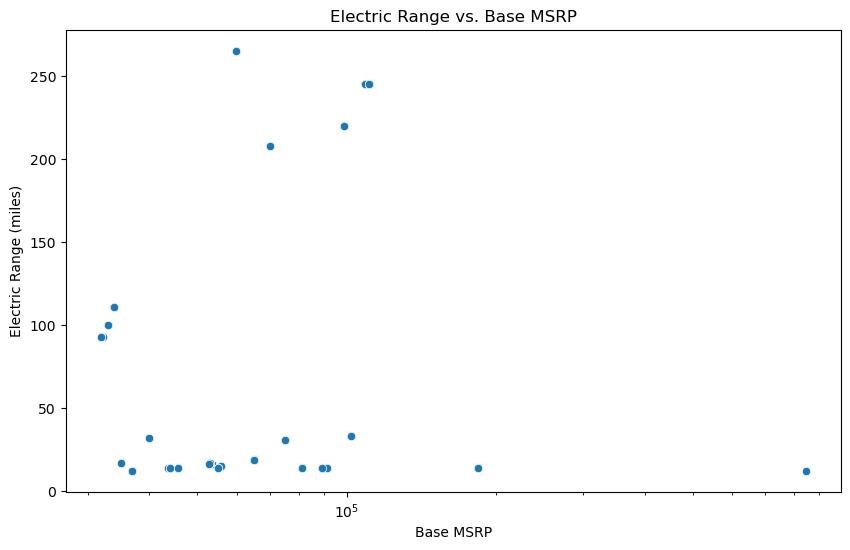

In [10]:
# Electric Range vs. Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=ev)
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

#Model Year vs Electric Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=original_ev)  
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

# Electric Range vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=ev[ev['Base MSRP'] > 0])
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range (miles)')
plt.xscale('log')
plt.show()



Electric Range vs. Model year:
- Upward trend showing newer models generally have greater electric range. This is a sign model year could be a good predictor for electric range.

Electric Range vs. Base MSRP
- More expensive vehicles tend to have higher electric range, but does not show a relationship. 

Electric Range vs. Model year box plot:
- Increase in the median electric range over the years.
- Larger interquartile range suggests variability in electric range.
- Outliers present across various years. Possibly due to special models, models not commonly in terms of performance, designs defined that follow the trend of each year, etc.

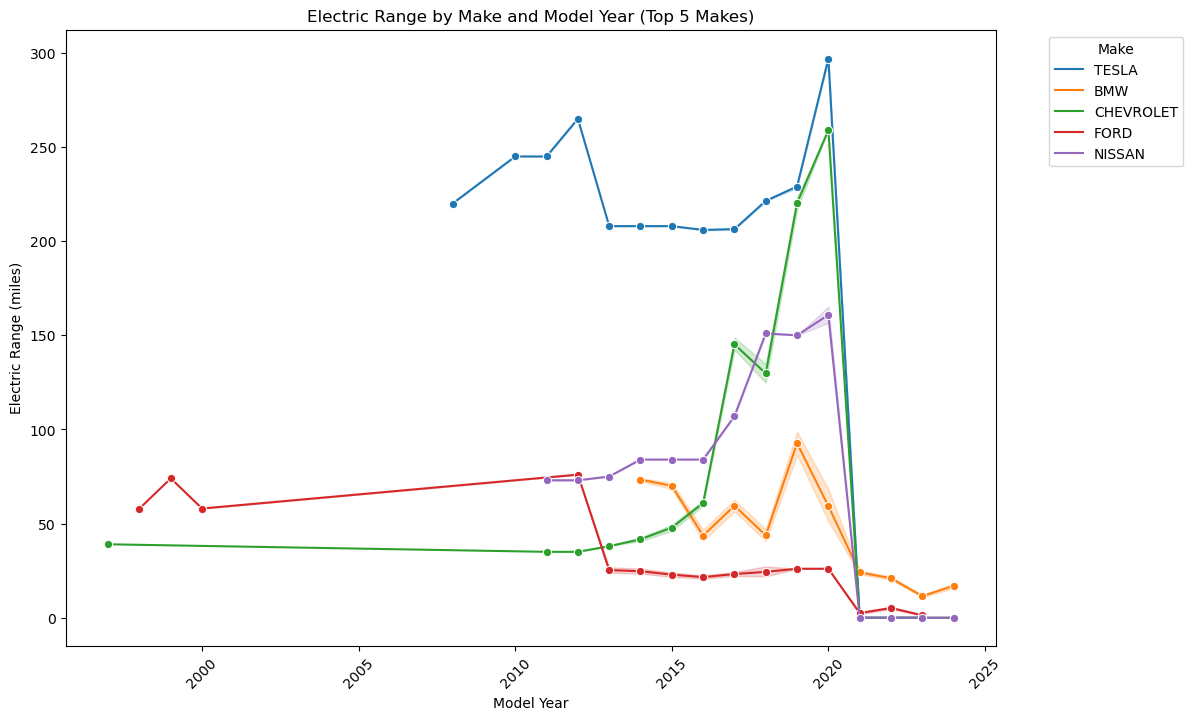

In [71]:
# Electric Range by Make and Model Year 
plt.figure(figsize=(12, 8))
top_makes = ev['Make'].value_counts().nlargest(5).index
subset_data = ev[ev['Make'].isin(top_makes)]
sns.lineplot(x='Model Year', y='Electric Range', hue='Make', data=subset_data, marker='o')
plt.title('Electric Range by Make and Model Year (Top 5 Makes)')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Electric Range by make and model year:

Electric range increased for most car makes over time. Tesla Seems to be steady across years since the late 2000s while Chevrolet seem to have a steady increase competiting Tesla followed by Nissan and BMW.

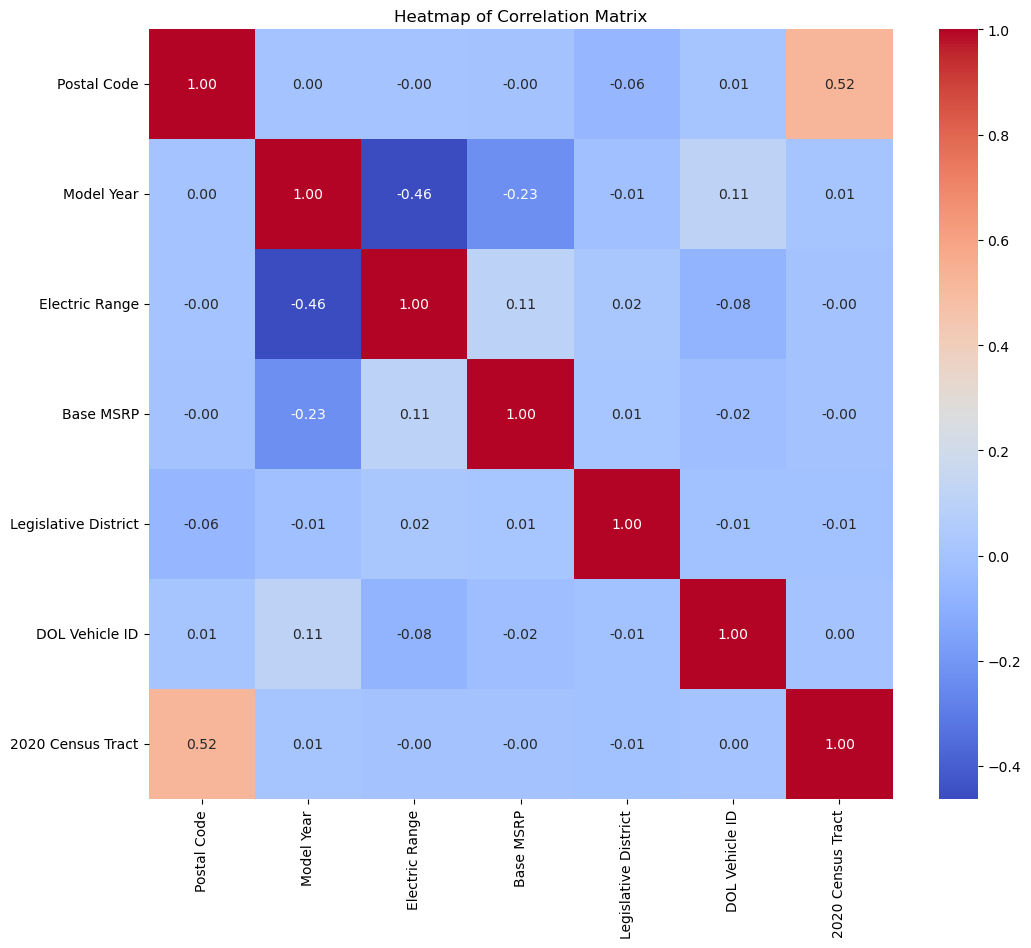

In [63]:
#Calculating the correlation matrix
corr = ev.select_dtypes(include=['float64', 'int64']).corr()

#Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Correlation Matrix: 


There seems to have no strong linear correlations between electric range and other numerical features. 
From the previous results, we saw newer year leads to higher Electric Range. I suspect the relationship might be non-linear or influenced by other factors. It may be, technological advancement do not increase electric range across all models and makes or different vehicles types (the BEVs and PHEVs) could be skewing the results to a different direction.



#### **Data Preprocessing** ####

In [10]:
#Searching for missing values
missing_values = ev.isnull().sum()
missing_values

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [11]:
#Missing values and its percentage
missing_values = missing_values[missing_values > 0]
percent_missing = (missing_values / len(ev)) * 100

print(missing_values)
missing_df = pd.DataFrame({'missing value count': missing_values, 'percent': percent_missing})
print(missing_df)


County                    5
City                      5
Postal Code               5
Legislative District    360
Vehicle Location         10
Electric Utility          5
2020 Census Tract         5
dtype: int64
                      missing value count   percent
County                                  5  0.002998
City                                    5  0.002998
Postal Code                             5  0.002998
Legislative District                  360  0.215827
Vehicle Location                       10  0.005995
Electric Utility                        5  0.002998
2020 Census Tract                       5  0.002998


Legislative District with the most values though, out of on average 166,000 columns not much. Needs to be handled. Depending on numerical or categorical, appropriately handled. 
Numerical: used median, Categorical: used mode.

In [12]:
#Handling Missing values
ev['Postal Code'].fillna(ev['Postal Code'].median(), inplace = True)
ev['Legislative District'].fillna(ev['Legislative District'].median(),inplace = True)
ev['2020 Census Tract'].fillna(ev['2020 Census Tract'].median(), inplace = True)

In [13]:
#Handling missing for categorical values
ev['County'].fillna(ev['County'].mode()[0], inplace=True)
ev['City'].fillna(ev['City'].mode()[0], inplace=True)
ev['Vehicle Location'].fillna(ev['Vehicle Location'].mode()[0], inplace=True)
ev['Electric Utility'].fillna(ev['Electric Utility'].mode()[0], inplace=True)

In [14]:
print(ev.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


#### **One-hot encoding for categorical variables** ####

In [15]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166800 non-null  object 
 2   City                                               166800 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166800 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [16]:
# One-hot encode the categorical variables
categorical_features = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']  # Update this list with your actual categorical columns

# Get dummy variables for categorical features
ev_encoded = pd.get_dummies(ev, columns=categorical_features, drop_first=True)

ev_encoded

,VIN (1-10),Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,County_Adams,County_Alameda,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,3C3CFFGE4E,98902.0,2014,87,0,14.0,1593721,5.307700e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5YJXCBE40H,98513.0,2017,200,0,2.0,257167501,5.306701e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3MW39FS03P,98058.0,2023,20,0,11.0,224071816,5.303303e+10,False,False,...,False,False,False,False,False,False,False,False,True,False
3,7PDSGABA8P,98012.0,2023,0,0,21.0,260084653,5.306105e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5YJ3E1EB8L,98031.0,2020,322,0,33.0,253771913,5.303303e+10,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,99223.0,2013,19,0,6.0,239527123,5.306300e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
166796,5YJYGDEE5M,98074.0,2021,0,0,45.0,148715479,5.303303e+10,False,False,...,False,False,False,False,False,False,False,False,True,False
166797,7SAYGDEE5N,98275.0,2022,0,0,21.0,220504406,5.306104e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
166798,1G1RH6E43D,98564.0,2013,38,0,20.0,156418475,5.304197e+10,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Scale the numerical features
numerical_features = ev_encoded.select_dtypes(include=['int64', 'float64']).columns.difference(['Electric Range'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
ev_encoded[numerical_features] = scaler.fit_transform(ev_encoded[numerical_features])

ev_encoded[numerical_features]

,2020 Census Tract,Base MSRP,DOL Vehicle ID,Legislative District,Model Year,Postal Code
0,0.063646,-0.133093,-2.790684,-1.023498,-2.112906,0.298168
1,0.057283,-0.133093,0.516672,-1.832205,-1.113391,0.138908
2,0.035632,-0.133093,0.088384,-1.225675,0.885639,-0.047374
3,0.053486,-0.133093,0.554423,-0.551753,0.885639,-0.066207
4,0.035634,-0.133093,0.472730,0.256954,-0.113876,-0.058428
...,...,...,...,...,...,...
166795,0.054730,-0.133093,0.288390,-1.562636,-2.446077,0.429589
166796,0.035636,-0.133093,-0.886795,1.065660,0.219296,-0.040823
166797,0.053480,-0.133093,0.042219,-0.551753,0.552468,0.041468
166798,0.041331,-0.133093,-0.787111,-0.619145,-2.446077,0.159788


#### **Modeling** ####

In [18]:
#Creating a copy before proceeding with the modeling
ev_copy = ev_encoded.copy()
ev_copy = ev_copy.drop(['VIN (1-10)'], axis = 1)


In [19]:
ev_copy.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract',
       'County_Adams', 'County_Alameda', 'County_Albemarle',
       ...
       'Electric Utility_PORTLAND GENERAL ELECTRIC CO',
       'Electric Utility_PUD NO 1 OF CHELAN COUNTY',
       'Electric Utility_PUD NO 1 OF DOUGLAS COUNTY',
       'Electric Utility_PUD NO 1 OF OKANOGAN COUNTY',
       'Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY',
       'Electric Utility_PUD NO 1 OF WHATCOM COUNTY',
       'Electric Utility_PUD NO 2 OF GRANT COUNTY',
       'Electric Utility_PUGET SOUND ENERGY INC',
       'Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY'],
      dtype='object', length=2026)

In [21]:
#Splitting the data - 80%, 20% split 
X = ev_copy.drop('Electric Range', axis = 1)
y = ev_copy['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

In [22]:
#Linear Regression model
linear_model = LinearRegression()

#Fit the model - training data
linear_model.fit(X_train, y_train)

#Predict on the test data
y_pred_linear = linear_model.predict(X_test)

#Evaluate the model - MSE, R2
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R^2 Score: {r2_linear}")


Linear Regression Mean Squared Error: 9.351203983712901e+21
Linear Regression R^2 Score: -1.0702219794169606e+18


In [24]:
#Random Forest Regressor
rf_model = RandomForestRegressor(random_state=150)

#Fit the model - training data
rf_model.fit(X_train, y_train)

#Predict on the test data
y_pred_rf = rf_model.predict(X_test)

#Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R^2 Score: {r2_rf}")

Random Forest Regressor Mean Squared Error: 23.523701780575543
Random Forest Regressor R^2 Score: 0.997307770985782


In [33]:
print(rf_model)

RandomForestRegressor(random_state=150)


In [27]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=150)

#Fitting the model on the train
gb_model.fit(X_train, y_train)

#Predicting on the test
y_pred_gb = gb_model.predict(X_test)

#Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regressor R^2 Score: {r2_gb}")

Gradient Boosting Regressor Mean Squared Error: 67.78667107649773
Gradient Boosting Regressor R^2 Score: 0.9922419845162258


In [30]:
#Summary table
model_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'R2 Score': [r2_linear, r2_rf, r2_gb]
})

print(model_summary)



                         Model           MSE      R2 Score
0            Linear Regression  9.351204e+21 -1.070222e+18
1      Random Forest Regressor  2.352370e+01  9.973078e-01
2  Gradient Boosting Regressor  6.778667e+01  9.922420e-01


#### **Results** ####

- Linear Regression: MSE 9.35 × 10<sup>21</sup>, R2 Score -1.07 × 10<sup>18</sup>
Performed extremely poorly - high MSE and a negative R2 scores. The model was not able to capture the realtionship. 
- Random Forest Regressor: MSE 2.35, R2 Score 0.9973
Excellent Performance, with low MSE and high R2 score.
- Gradient Boosting Regressor: MSE 6.78, R2 Score 0.9922
While it did not performed as much as random forest, Gradient Boosting model performed exceptionally well. MSE is higher but, R2 score is low. 

Possible reason for difference in results. Linear regression is likely to have performed poorly because it was not able to capture non-linear relationship. Tree based models like random forest and gradient boosting handle non-linearity and feature interactions more 
effectively than linear models. The ability to perform feature selection helps to managing issues like high dimensional data and multicollinearity.

In [58]:
#Deciding feature importance - Random Forest
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['Important_features_rf']).sort_values('Important_features_rf', ascending=False)
print("Random Forest Regressor Importance Features:\n", feature_importances_rf.head(15))
print("")

#Gradient Boosting Regressor Features Importance
feature_importances_gb = pd.DataFrame(gb_model.feature_importances_, index=X_train.columns, columns=['Importance_features_gb']).sort_values('Importance_features_gb', ascending=False)
print("Gradient Boosting Regressor Feature Importances:\n", feature_importances_gb.head(15))


Random Forest Regressor Importance Features:
                                                     Important_features_rf
Model Year                                                       0.595902
Electric Vehicle Type_Plug-in Hybrid Electric V...               0.251936
Model_LEAF                                                       0.040917
Make_NISSAN                                                      0.036213
Make_TESLA                                                       0.028976
Model_BOLT EV                                                    0.017213
Clean Alternative Fuel Vehicle (CAFV) Eligibili...               0.012899
Clean Alternative Fuel Vehicle (CAFV) Eligibili...               0.003845
Model_MODEL 3                                                    0.001904
Make_VOLKSWAGEN                                                  0.001023
Model_I3                                                         0.000994
Model_E-GOLF                                                     0

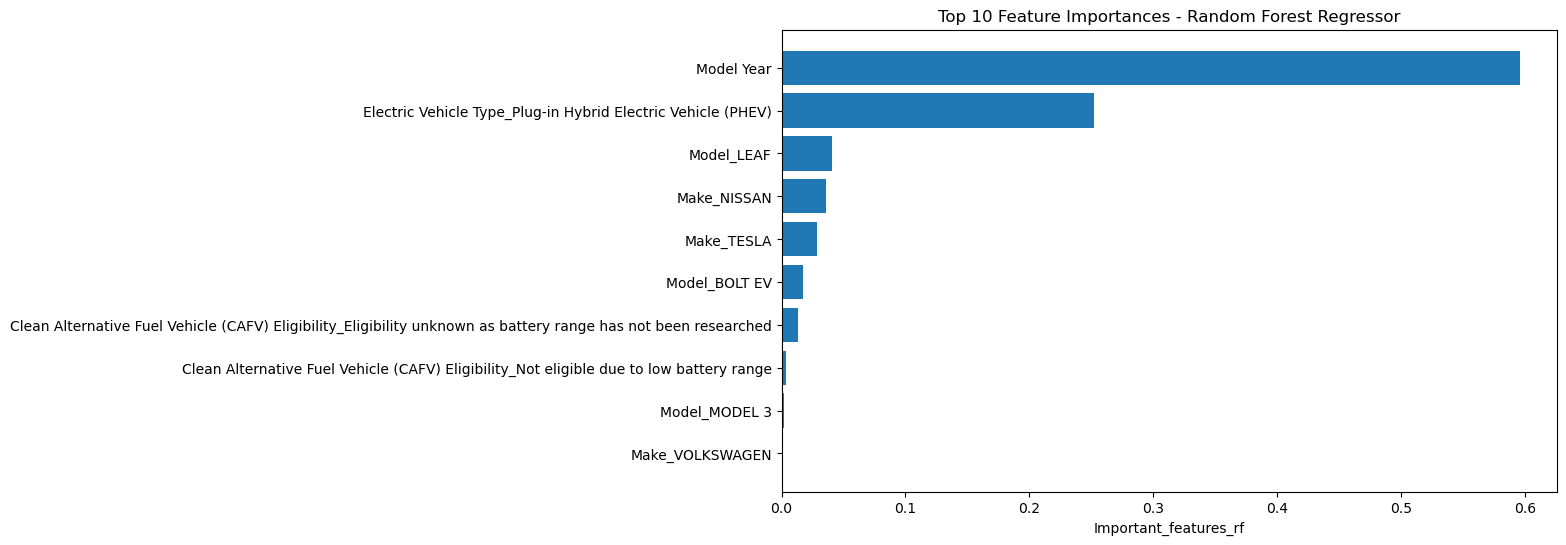

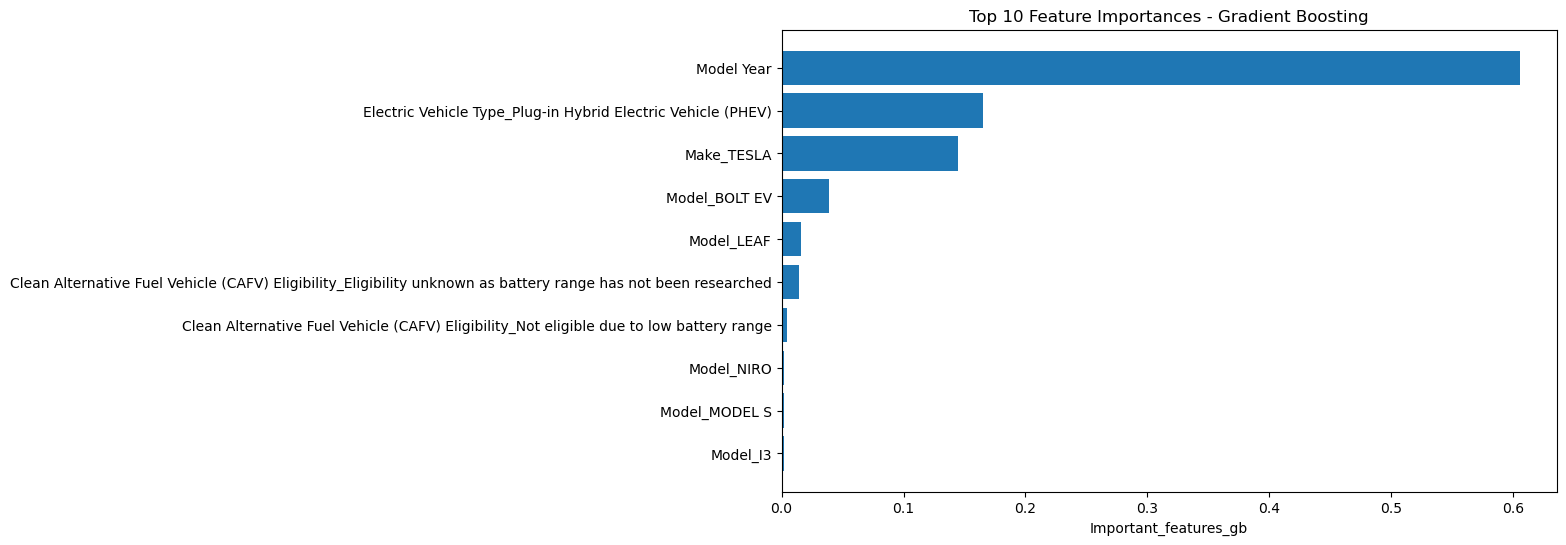

In [60]:
# Visualizing the top 10 feature importances from the Random Forest model
top_features_rf = feature_importances_rf.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_rf.index, top_features_rf['Important_features_rf'])
plt.xlabel('Important_features_rf')
plt.title('Top 10 Feature Importances - Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

top_features_gb = feature_importances_gb.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features_gb.index, top_features_gb['Importance_features_gb'])
plt.xlabel('Important_features_gb')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

- Model year: Most important feature for both models. Which is likely the technological advancements over time. Newer models tend to have better battery technology and design optimizations.
- Electric Vehicle Type: The plug-in hybrid electric vehicle seems to influence its electric range. The design and how it's manufactured seems to have influence on capabilities.
- Makes or models: Specific makes or model suggest certain manufacturers are influential in its car capabilities.

#### Conclusion: ####

Given the complexity of predicting electric vehicle range, which likely involves non-linear relationships and interactions between features, tree-based models are well-suited to this task. Their sturdiness to outliers and flexibility in modeling various data structures make them better choices.